# cygnus-vs-my5-degree

Compare Cygnus and my5 (versions 1 and 2) at high and low bandwidth settings.

Cap the degree to a maximum value.

1/29/2024

In [ ]:
from collections import defaultdict
from importlib import reload
import json
import os
import sys
from typing import Dict, List, Optional

from matplotlib import colormaps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath("../../"))
from plot_utils import collate, plot
from naboo_utils import table

# Configuration

In [ ]:
sim_dir = "/u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/"
baseline_study = "baseline"
baseline_experiment = "_baseline"
bandwidths = [200, 200]
weights_path = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
    "cloudsuite",
    "gap",
]
dpi = 192

In [4]:
reload(collate)
studies = {}
for bandwidth in bandwidths:
    print(f"\n=== {bandwidth} MT/s ===")
    core_str = f"default_{bandwidth}"
    core_dir = os.path.join(sim_dir, core_str)

    # my5 v1
    print(f"~~~ {os.path.join(core_dir, 'my5_v1')} ~~~")
    studies[f"my5_v1__{bandwidth}"] = collate.StudyCollator(
        core_dir, "my5_v1",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
    )
    print(f"~~~ {os.path.join(core_dir, 'my5_v1_degree')} ~~~")
    studies[f"my5_v1_degree__{bandwidth}"] = collate.StudyCollator(
        core_dir, "my5_v1_degree",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
    )

    # my5 v2
    print(f"~~~ {os.path.join(core_dir, 'my5_v2')} ~~~")
    studies[f"my5_v2__{bandwidth}"] = collate.StudyCollator(
        core_dir, "my5_v2",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
    )
    print(f"~~~ {os.path.join(core_dir, 'my5_v2_degree')} ~~~")
    studies[f"my5_v2_degree__{bandwidth}"] = collate.StudyCollator(
        core_dir, "my5_v2_degree",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
    )

    # Cygnus
    print(f"~~~ {os.path.join(core_dir, 'prefetchers')} ~~~")
    studies[f"prefetchers__{bandwidth}"] = collate.StudyCollator(
        core_dir, "prefetchers",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
        experiments=["cygnus"],
    )
    print(f"~~~ {os.path.join(core_dir, 'cygnus_degree')} ~~~")
    studies[f"cygnus_degree__{bandwidth}"] = collate.StudyCollator(
        core_dir, "cygnus_degree",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
    )


=== 200 MT/s ===
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v1 ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 97/97 [00:01<00:00, 64.57file/s] 


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v1_degree ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 776/776 [00:04<00:00, 184.82file/s]


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v2 ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 97/97 [00:01<00:00, 76.07file/s] 


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/my5_v2_degree ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 776/776 [00:04<00:00, 186.86file/s]


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/prefetchers ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 381/381 [00:05<00:00, 69.59file/s] 


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_200/cygnus_degree ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 776/776 [00:10<00:00, 73.99file/s] 


[ipykernel_launcher][angrist-3] Collating study files...

=== 3200 MT/s ===
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200/my5_v1 ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 97/97 [00:01<00:00, 63.99file/s] 


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200/my5_v1_degree ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 776/776 [00:04<00:00, 173.53file/s]


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200/my5_v2 ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 97/97 [00:01<00:00, 73.36file/s] 


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200/my5_v2_degree ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 776/776 [00:04<00:00, 170.44file/s]


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200/prefetchers ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 381/381 [00:05<00:00, 67.40file/s] 


[ipykernel_launcher][angrist-3] Collating study files...
~~~ /u/cmolder/GitHub/ChampSim-2022/sim/dram_dramsim3_2022/default_3200/cygnus_degree ~~~


[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 776/776 [00:10<00:00, 70.85file/s]


[ipykernel_launcher][angrist-3] Collating study files...


In [5]:
baseline_df_3200 = {
    "Cygnus (max1)": studies["cygnus_degree__3200"]["cygnus__max1"],
    "Cygnus (max2)": studies["cygnus_degree__3200"]["cygnus__max2"],
    "Cygnus (max3)": studies["cygnus_degree__3200"]["cygnus__max3"],
    "Cygnus (max4)": studies["cygnus_degree__3200"]["cygnus__max4"],
    "Cygnus (max5)": studies["cygnus_degree__3200"]["cygnus__max5"],
    "Cygnus (max6)": studies["cygnus_degree__3200"]["cygnus__max6"],
    "Cygnus (max7)": studies["cygnus_degree__3200"]["cygnus__max7"],
    "Cygnus (max8)": studies["cygnus_degree__3200"]["cygnus__max8"],
    "Cygnus (unconstrained)": studies["prefetchers__3200"]["cygnus"],
    "my5 v1 (max1)": studies["my5_v1_degree__3200"]["my5_v1__max1"],
    "my5 v1 (max2)": studies["my5_v1_degree__3200"]["my5_v1__max2"],
    "my5 v1 (max3)": studies["my5_v1_degree__3200"]["my5_v1__max3"],
    "my5 v1 (max4)": studies["my5_v1_degree__3200"]["my5_v1__max4"],
    "my5 v1 (max5)": studies["my5_v1_degree__3200"]["my5_v1__max5"],
    "my5 v1 (max6)": studies["my5_v1_degree__3200"]["my5_v1__max6"],
    "my5 v1 (max7)": studies["my5_v1_degree__3200"]["my5_v1__max7"],
    "my5 v1 (max8)": studies["my5_v1_degree__3200"]["my5_v1__max8"],
    "my5 v1 (unconstrained)": studies["my5_v1__3200"]["my5_v1"],
    "my5 v2 (max1)": studies["my5_v2_degree__3200"]["my5_v2__max1"],
    "my5 v2 (max2)": studies["my5_v2_degree__3200"]["my5_v2__max2"],
    "my5 v2 (max3)": studies["my5_v2_degree__3200"]["my5_v2__max3"],
    "my5 v2 (max4)": studies["my5_v2_degree__3200"]["my5_v2__max4"],
    "my5 v2 (max5)": studies["my5_v2_degree__3200"]["my5_v2__max5"],
    "my5 v2 (max6)": studies["my5_v2_degree__3200"]["my5_v2__max6"],
    "my5 v2 (max7)": studies["my5_v2_degree__3200"]["my5_v2__max7"],
    "my5 v2 (max8)": studies["my5_v2_degree__3200"]["my5_v2__max8"],
    "my5 v2 (unconstrained)": studies["my5_v2__3200"]["my5_v2"],
}
baseline_df_200 = {
    "Cygnus (max1)": studies["cygnus_degree__200"]["cygnus__max1"],
    "Cygnus (max2)": studies["cygnus_degree__200"]["cygnus__max2"],
    "Cygnus (max3)": studies["cygnus_degree__200"]["cygnus__max3"],
    "Cygnus (max4)": studies["cygnus_degree__200"]["cygnus__max4"],
    "Cygnus (max5)": studies["cygnus_degree__200"]["cygnus__max5"],
    "Cygnus (max6)": studies["cygnus_degree__200"]["cygnus__max6"],
    "Cygnus (max7)": studies["cygnus_degree__200"]["cygnus__max7"],
    "Cygnus (max8)": studies["cygnus_degree__200"]["cygnus__max8"],
    "Cygnus (unconstrained)": studies["prefetchers__200"]["cygnus"],
    "my5 v1 (max1)": studies["my5_v1_degree__200"]["my5_v1__max1"],
    "my5 v1 (max2)": studies["my5_v1_degree__200"]["my5_v1__max2"],
    "my5 v1 (max3)": studies["my5_v1_degree__200"]["my5_v1__max3"],
    "my5 v1 (max4)": studies["my5_v1_degree__200"]["my5_v1__max4"],
    "my5 v1 (max5)": studies["my5_v1_degree__200"]["my5_v1__max5"],
    "my5 v1 (max6)": studies["my5_v1_degree__200"]["my5_v1__max6"],
    "my5 v1 (max7)": studies["my5_v1_degree__200"]["my5_v1__max7"],
    "my5 v1 (max8)": studies["my5_v1_degree__200"]["my5_v1__max8"],
    "my5 v1 (unconstrained)": studies["my5_v1__200"]["my5_v1"],
    "my5 v2 (max1)": studies["my5_v2_degree__200"]["my5_v2__max1"],
    "my5 v2 (max2)": studies["my5_v2_degree__200"]["my5_v2__max2"],
    "my5 v2 (max3)": studies["my5_v2_degree__200"]["my5_v2__max3"],
    "my5 v2 (max4)": studies["my5_v2_degree__200"]["my5_v2__max4"],
    "my5 v2 (max5)": studies["my5_v2_degree__200"]["my5_v2__max5"],
    "my5 v2 (max6)": studies["my5_v2_degree__200"]["my5_v2__max6"],
    "my5 v2 (max7)": studies["my5_v2_degree__200"]["my5_v2__max7"],
    "my5 v2 (max8)": studies["my5_v2_degree__200"]["my5_v2__max8"],
    "my5 v2 (unconstrained)": studies["my5_v2__200"]["my5_v2"],
}

baseline_colors = {
    "Cygnus (max1)": colormaps["Set3"](0),
    "Cygnus (max2)": colormaps["Set3"](0),
    "Cygnus (max3)": colormaps["Set3"](0),
    "Cygnus (max4)": colormaps["Set3"](0),
    "Cygnus (max5)": colormaps["Set3"](0),
    "Cygnus (max6)": colormaps["Set3"](0),
    "Cygnus (max7)": colormaps["Set3"](0),
    "Cygnus (max8)": colormaps["Set3"](0),
    "Cygnus (unconstrained)": colormaps["Set3"](0),
    "my5 v1 (max1)": colormaps["Set3"](9),
    "my5 v1 (max2)": colormaps["Set3"](9),
    "my5 v1 (max3)": colormaps["Set3"](9),
    "my5 v1 (max4)": colormaps["Set3"](9),
    "my5 v1 (max5)": colormaps["Set3"](9),
    "my5 v1 (max6)": colormaps["Set3"](9),
    "my5 v1 (max7)": colormaps["Set3"](9),
    "my5 v1 (max8)": colormaps["Set3"](9),
    "my5 v1 (unconstrained)": colormaps["Set3"](9),
    "my5 v2 (max1)": colormaps["Set3"](8),
    "my5 v2 (max2)": colormaps["Set3"](8),
    "my5 v2 (max3)": colormaps["Set3"](8),
    "my5 v2 (max4)": colormaps["Set3"](8),
    "my5 v2 (max5)": colormaps["Set3"](8),
    "my5 v2 (max6)": colormaps["Set3"](8),
    "my5 v2 (max7)": colormaps["Set3"](8),
    "my5 v2 (max8)": colormaps["Set3"](8),
    "my5 v2 (unconstrained)": colormaps["Set3"](8)
}
baseline_hatches = defaultdict(lambda: None, {
    "Cygnus": "",
    "my5 (v1)": "",
    "my5 (v2)": "//",
})

baseline_legend_kwargs = {
    "ncol": 3,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
baseline_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

# Results
## 3200 MT/s
### IPC improvement

In [6]:
reload(plot)
plot.get_suite_table(
    baseline_df_3200, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gmean
Cygnus (max1),17.578618,13.543374,3.479710,16.101879,12.537212
Cygnus (max2),32.327193,24.601866,10.320796,20.258068,21.614768
Cygnus (max3),33.813239,25.328460,10.811660,21.164925,22.497660
Cygnus (max4),34.256964,25.627908,10.926909,21.573968,22.807563
Cygnus (max5),34.351285,25.581081,10.955904,21.759627,22.872570
Cygnus (max6),34.429900,25.599793,10.949132,21.880167,22.923647
Cygnus (max7),34.401339,25.579874,10.936345,21.958245,22.928382
Cygnus (max8),34.376612,25.501535,10.921196,22.017332,22.914240
Cygnus (unconstrained),34.157117,25.502473,10.803229,22.131828,22.860370
my5 v1 (max1),13.895735,8.551599,3.149851,14.779113,9.993948


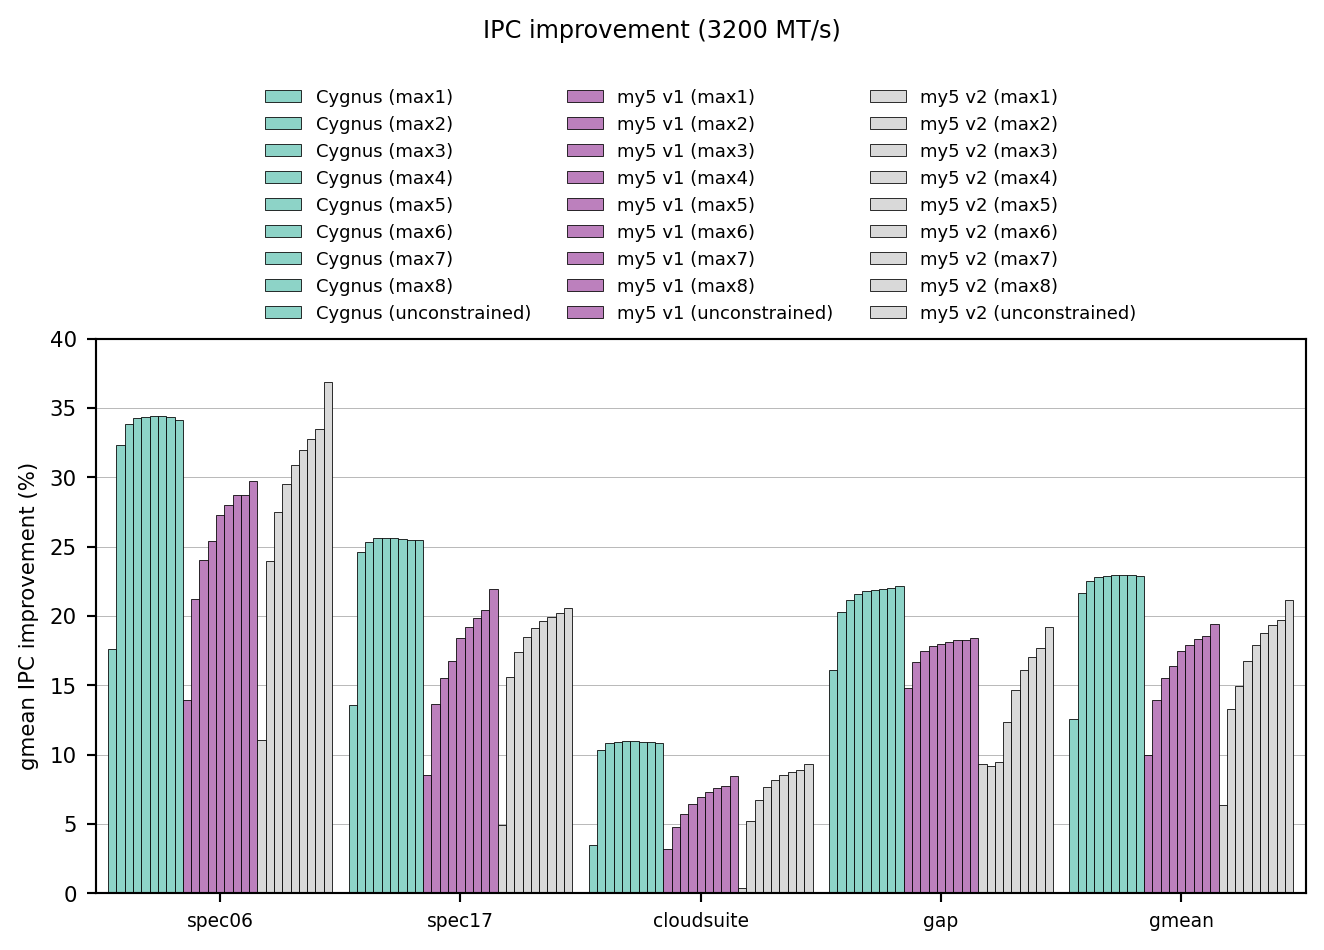

In [9]:
reload(plot)
plot.plot_suite_statistic(
    baseline_df_3200, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (3200 MT/s)",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 40),
    ytick_distance=5,
    dpi=192, figsize=(7, 5))
plt.savefig("3200_ipc.png", dpi=dpi, bbox_inches="tight")
plt.savefig("3200_ipc.pdf", dpi=dpi, bbox_inches="tight")

#### spec06

In [22]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_3200, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (max1),Cygnus (max2),Cygnus (max3),Cygnus (max4),Cygnus (max5),Cygnus (max6),Cygnus (max7),Cygnus (max8),Cygnus (unconstrained),my5 v1 (max1),...,my5 v1 (unconstrained),my5 v2 (max1),my5 v2 (max2),my5 v2 (max3),my5 v2 (max4),my5 v2 (max5),my5 v2 (max6),my5 v2 (max7),my5 v2 (max8),my5 v2 (unconstrained)
GemsFDTD,30.706618,75.707744,78.632839,78.950990,79.277557,79.209014,78.870189,78.577413,78.112278,29.057140,...,63.754265,15.648202,35.958379,49.522617,56.209733,60.380112,63.866109,66.378199,68.653928,87.140679
astar,6.399252,6.578969,6.635912,6.656359,6.674376,6.701214,6.655025,6.689156,6.647592,1.133535,...,2.039300,5.440632,8.463076,9.909432,10.389011,10.575410,10.729572,10.744271,10.805755,10.873914
bwaves,19.050260,47.134909,48.003659,46.895142,46.366687,45.371115,44.935448,44.633054,43.486044,17.180671,...,20.267592,11.512003,16.355387,20.977116,20.998208,22.459088,24.801956,27.123725,29.123584,42.205341
cactusADM,61.513150,66.695603,66.411236,66.184548,66.137153,66.080886,66.017706,66.028825,66.101280,30.687738,...,42.001923,27.320274,40.883005,48.303902,51.062674,52.710863,54.046318,54.878644,55.823178,62.155177
gcc,8.498653,20.351155,24.790611,28.877503,30.361579,31.440198,31.894966,32.215106,32.507038,9.863884,...,24.732522,3.295571,7.984661,13.271732,20.685412,25.701499,28.327485,29.653130,30.454992,30.735022
lbm,27.299873,47.695078,48.814457,49.103513,49.571026,49.783938,49.917779,50.088941,50.488014,1.692482,...,49.612115,1.967845,47.671285,49.357287,49.623071,49.834023,49.735354,50.134407,50.407264,54.461973
leslie3d,14.422908,30.227600,31.419915,31.491450,31.514177,31.328356,31.203768,31.108368,30.867163,12.899572,...,25.811917,12.270665,24.312506,27.302972,28.915472,29.986251,30.684698,31.101649,31.511051,34.283757
libquantum,23.166180,63.368598,65.179759,64.589989,64.322386,65.269642,64.969225,66.014022,66.853207,23.298464,...,67.037749,22.576339,64.795219,66.231365,66.386517,65.040011,63.937766,63.788822,63.883886,60.326978
mcf,11.520429,11.096955,10.976836,11.275009,11.162561,11.666061,11.940323,11.582192,11.826420,24.075874,...,25.396275,30.413572,38.059080,39.761978,41.023249,41.995939,42.583245,43.154264,43.485376,42.930523
milc,7.450922,13.752371,14.324800,13.638394,12.456920,11.732695,11.228577,10.552833,8.870268,9.571378,...,25.875379,8.525781,19.064696,20.888584,21.745827,22.593747,22.885062,23.317132,23.408883,23.835121


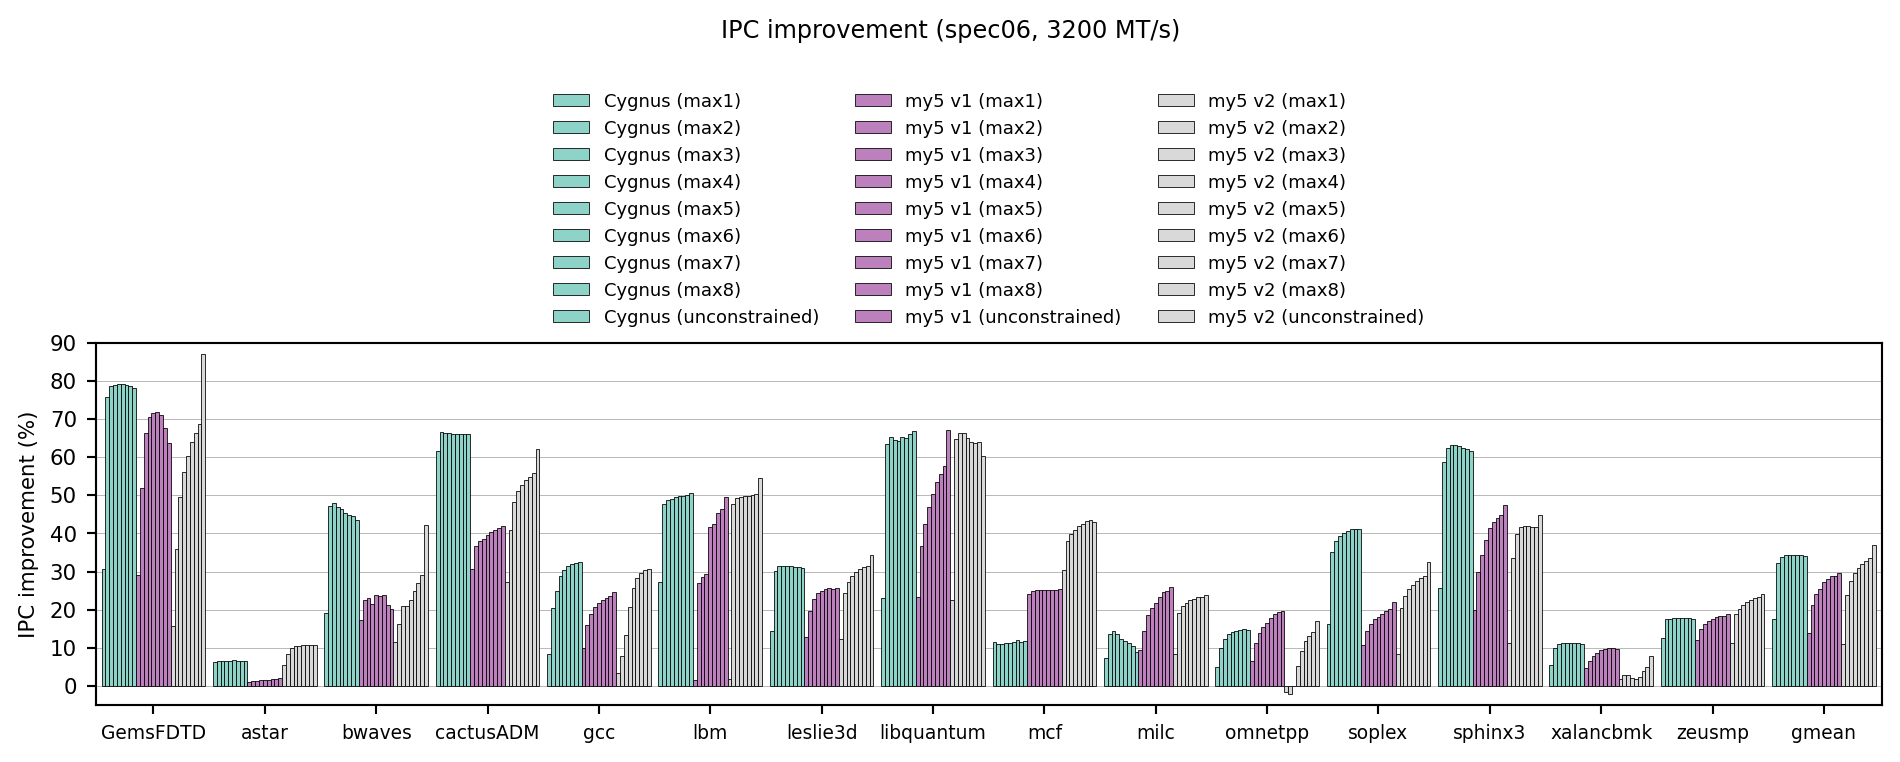

In [23]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_3200, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec06, 3200 MT/s)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 90),
    ytick_distance=10,
    dpi=192, figsize=(10, 4))

#### spec17

In [24]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_3200, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (max1),Cygnus (max2),Cygnus (max3),Cygnus (max4),Cygnus (max5),Cygnus (max6),Cygnus (max7),Cygnus (max8),Cygnus (unconstrained),my5 v1 (max1),...,my5 v1 (unconstrained),my5 v2 (max1),my5 v2 (max2),my5 v2 (max3),my5 v2 (max4),my5 v2 (max5),my5 v2 (max6),my5 v2 (max7),my5 v2 (max8),my5 v2 (unconstrained)
602.gcc,47.827930,66.278244,66.748637,66.846310,66.965171,66.974131,66.980837,66.924271,66.731995,46.268103,...,64.471435,21.959808,44.802304,50.780917,55.494523,57.905880,59.014301,59.550681,59.669641,56.036179
605.mcf,4.613306,8.103724,7.916655,7.695927,7.494314,7.360644,7.207128,7.085266,6.733695,5.126014,...,10.507021,-2.808962,2.258686,2.808632,2.501178,2.312108,2.129375,1.928684,1.750757,-0.277175
607.cactuBSSN,28.427411,28.929253,28.655732,28.937539,28.807716,28.993615,28.752498,28.758727,28.868049,1.398570,...,12.213385,10.032066,11.288407,12.278380,12.978716,13.559738,14.194509,14.771163,15.154694,15.245638
619.lbm,13.022648,21.375808,21.810719,21.991865,22.131540,22.257543,22.333196,22.435793,22.644127,1.317478,...,22.064358,1.252677,21.743063,22.472151,22.733862,22.834303,22.847415,22.956514,23.053324,24.411942
620.omnetpp,5.309581,7.185854,7.926910,8.607481,8.758171,8.767492,8.972037,8.956234,9.373423,4.717640,...,11.000402,0.353659,0.900338,1.906333,3.162568,4.384094,5.567769,6.342844,7.027945,9.924452
623.xalancbmk,4.278575,11.792542,12.005671,11.922855,11.802719,11.814067,11.624187,11.625749,11.418051,4.532403,...,14.163494,-4.408093,2.608677,1.650888,0.690556,-0.059470,-0.728314,-1.267573,-1.829950,-3.806050
627.cam4,0.901371,1.622029,2.220766,2.179028,2.161842,2.416712,2.477526,2.205707,2.345705,0.320075,...,0.613893,1.058270,1.764488,1.616181,2.037676,1.894787,1.871763,1.907900,2.064248,1.859795
628.pop2,6.517926,16.903547,18.013200,18.477284,18.433864,18.361209,18.518502,18.391962,18.368821,3.346968,...,9.673318,5.965563,11.693376,13.850054,14.875553,15.314575,15.465091,15.594476,15.859552,16.932215
649.fotonik3d,18.387759,80.798726,85.499371,87.401755,87.007056,86.632114,86.466981,86.248695,86.030321,16.732999,...,71.568110,13.441372,56.021842,65.501090,70.981474,74.715653,78.631525,80.853732,82.921117,92.025156
gmean,13.543374,24.601866,25.328460,25.627908,25.581081,25.599793,25.579874,25.501535,25.502473,8.551599,...,21.966380,4.906757,15.589209,17.373148,18.481445,19.112417,19.625610,19.932129,20.185864,20.597465


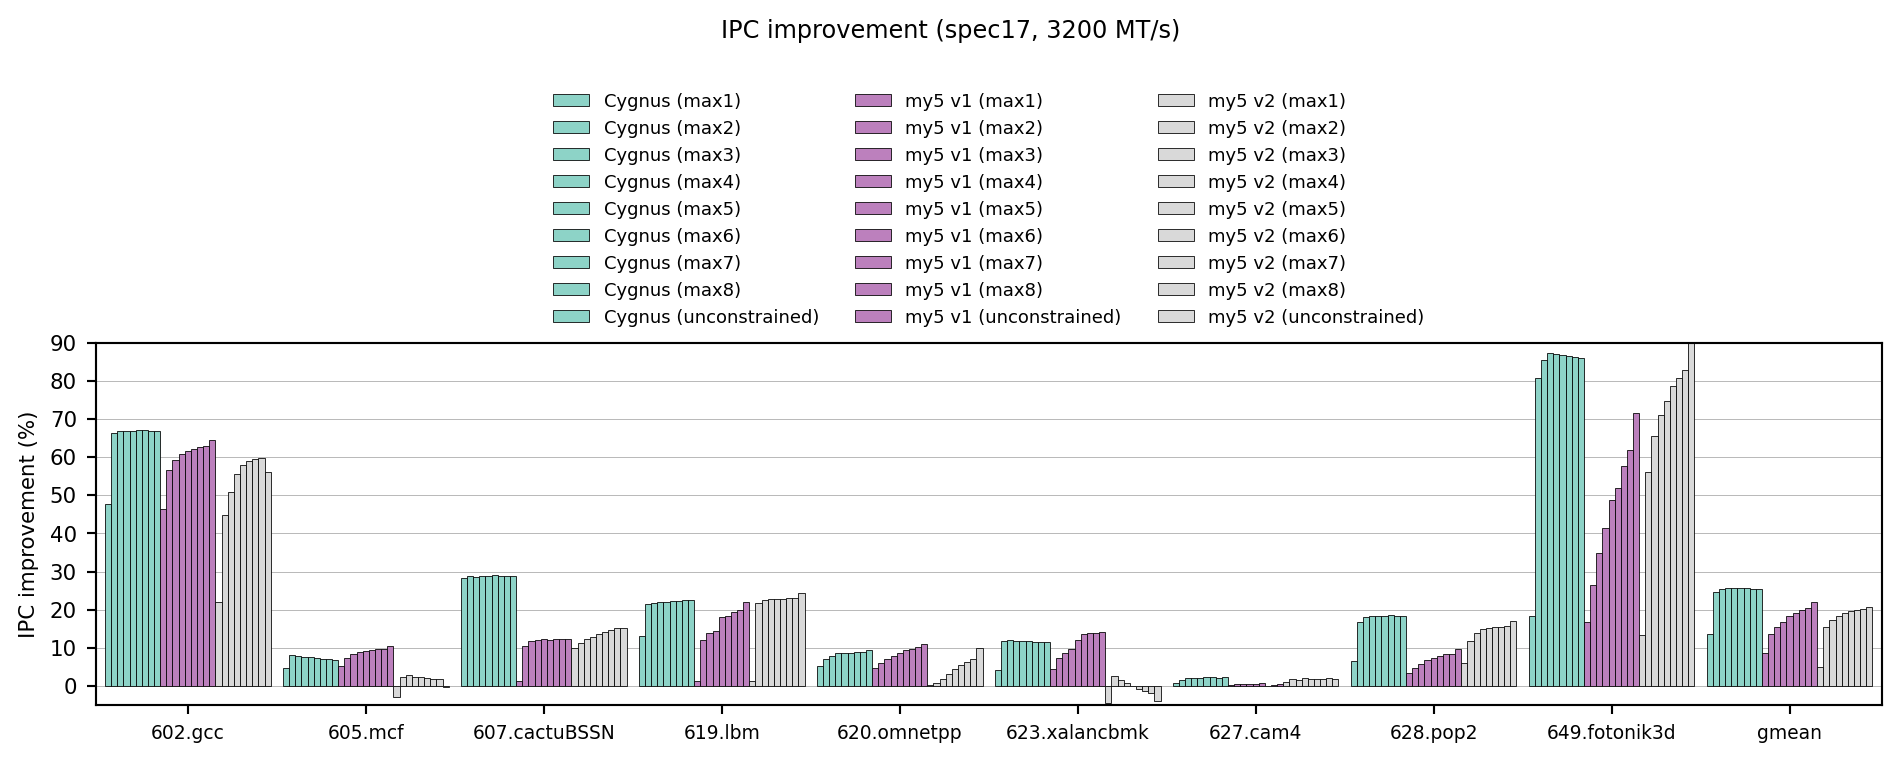

In [ ]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_3200, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec17, 3200 MT/s)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 4))

#### cloudsuite

In [26]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_3200, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (max1),Cygnus (max2),Cygnus (max3),Cygnus (max4),Cygnus (max5),Cygnus (max6),Cygnus (max7),Cygnus (max8),Cygnus (unconstrained),my5 v1 (max1),...,my5 v1 (unconstrained),my5 v2 (max1),my5 v2 (max2),my5 v2 (max3),my5 v2 (max4),my5 v2 (max5),my5 v2 (max6),my5 v2 (max7),my5 v2 (max8),my5 v2 (unconstrained)
cassandra,7.270530,12.124627,11.994063,11.649674,11.342395,11.146560,11.022357,10.857774,10.472271,6.684536,...,10.917722,4.797602,8.973499,10.357789,11.072345,11.470982,11.794259,12.092028,12.269358,13.569075
classifcation,-9.880836,-9.512471,-9.766241,-9.932230,-10.042175,-10.169295,-10.273429,-10.326437,-10.545401,-0.917368,...,-1.554008,-7.920775,-9.482277,-10.215438,-10.704469,-11.238974,-11.589967,-11.927212,-12.124196,-13.656832
cloud9,11.147847,21.291660,23.500088,24.493305,25.055029,25.470049,25.712383,25.958962,26.296021,2.722406,...,8.154536,1.097327,6.602798,10.577103,13.394582,15.444208,16.809620,17.803715,18.447578,21.619105
nutch,6.714192,20.367397,20.812125,20.941339,21.004355,20.958037,20.944422,20.892268,20.771383,4.258201,...,17.035573,4.157234,16.455867,18.291267,19.286379,19.813402,20.070646,20.247907,20.310851,19.889078
gmean,3.479710,10.320796,10.811660,10.926909,10.955904,10.949132,10.936345,10.921196,10.803229,3.149851,...,8.427739,0.400420,5.195248,6.697843,7.622904,8.159687,8.507343,8.745989,8.890598,9.349644


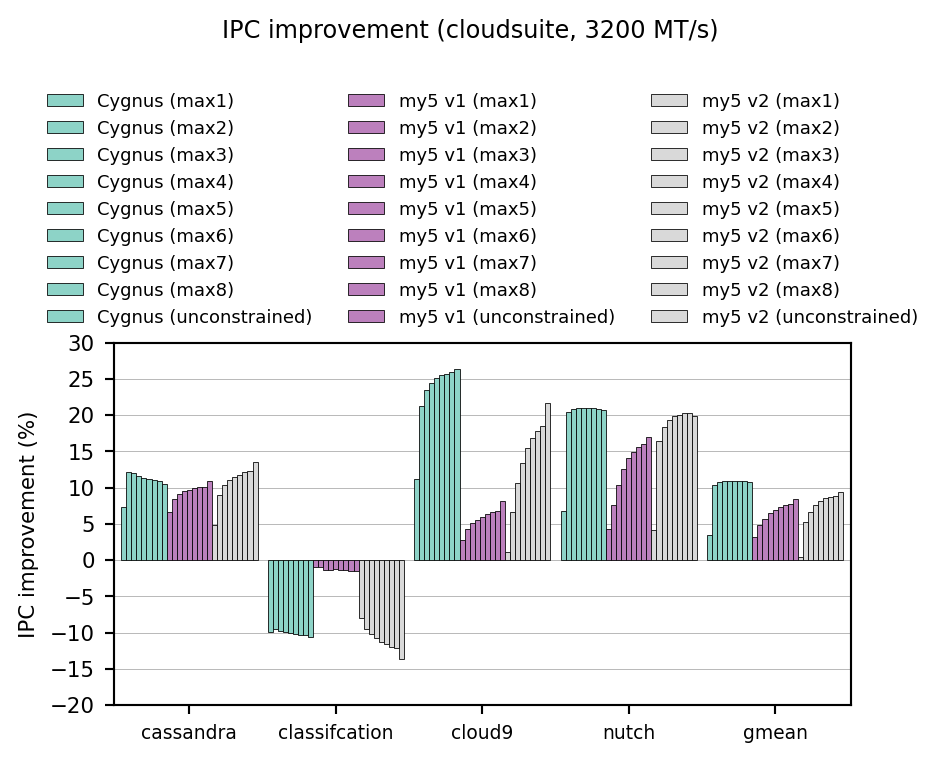

In [27]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_3200, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (cloudsuite, 3200 MT/s)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-20, 30),
    ytick_distance=5,
    dpi=192, figsize=(5, 4))

#### gap

In [28]:
reload(plot)
plot.get_benchmark_table(
    baseline_df_3200, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (max1),Cygnus (max2),Cygnus (max3),Cygnus (max4),Cygnus (max5),Cygnus (max6),Cygnus (max7),Cygnus (max8),Cygnus (unconstrained),my5 v1 (max1),...,my5 v1 (unconstrained),my5 v2 (max1),my5 v2 (max2),my5 v2 (max3),my5 v2 (max4),my5 v2 (max5),my5 v2 (max6),my5 v2 (max7),my5 v2 (max8),my5 v2 (unconstrained)
bc,9.671934,11.588686,11.721556,11.811057,11.898807,11.938305,11.894987,11.916901,11.938550,8.117740,...,9.980202,7.128235,8.698235,10.017413,10.448624,10.683906,10.682947,10.693565,10.654206,11.237620
bfs,35.288663,51.259496,57.068654,59.476993,60.715062,61.426760,61.972767,62.391777,63.083605,33.391534,...,44.085030,14.854734,11.838291,18.280779,28.346630,39.580706,47.539045,52.320032,55.227855,57.582512
cc,27.827456,34.610541,34.817007,34.866269,34.898233,34.919458,34.902885,34.978657,34.987449,27.400184,...,34.480785,16.342461,20.867242,25.606860,27.129368,28.119994,28.846271,29.412832,29.772665,31.074392
pr,1.277484,2.411994,2.573991,2.657083,2.697055,2.722496,2.759229,2.768223,2.785289,0.558660,...,2.178459,0.933739,1.083512,0.355355,1.100686,1.261582,1.152401,1.025747,0.876004,0.768874
sssp,5.909327,8.197198,8.146403,8.278970,8.189322,8.198870,8.210882,8.154654,8.210877,2.813014,...,4.426562,3.715063,4.292256,5.206797,5.383213,5.457612,5.471655,5.507280,5.454627,4.037949
tc,20.394688,20.142489,20.570483,20.788162,20.889664,20.970954,21.032317,21.032017,21.084317,20.368913,...,21.106249,13.741401,9.292893,-0.356076,4.549884,7.460836,9.006648,10.474239,11.869927,19.273425
gmean,16.101879,20.258068,21.164925,21.573968,21.759627,21.880167,21.958245,22.017332,22.131828,14.779113,...,18.391834,9.294417,9.171092,9.455441,12.315569,14.652432,16.083567,17.032202,17.656144,19.231198


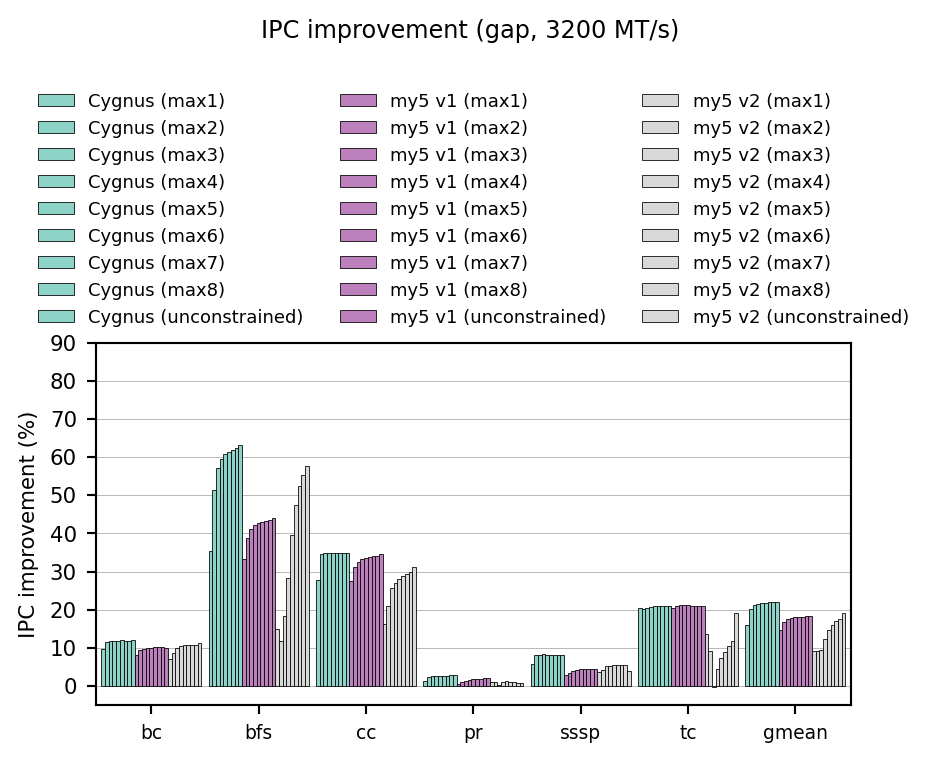

In [29]:
reload(plot)
plot.plot_benchmark_statistic(
    baseline_df_3200, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap, 3200 MT/s)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 90),
    ytick_distance=10,
    dpi=192, figsize=(5, 4))

### Prefetch L2 misses

In [17]:
reload(plot)
plot.get_suite_table(
    baseline_df_3200, "cache.L2C.amean.prefetch_miss",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,amean
Cygnus (max1),2.094096e+06,1.526417e+06,6.881275e+05,3.077325e+06,1.846492e+06
Cygnus (max2),3.385107e+06,2.294995e+06,1.182241e+06,4.307822e+06,2.792541e+06
Cygnus (max3),3.734068e+06,2.455297e+06,1.401250e+06,4.777768e+06,3.092096e+06
Cygnus (max4),3.952459e+06,2.536346e+06,1.545832e+06,5.050050e+06,3.271172e+06
Cygnus (max5),4.060938e+06,2.584443e+06,1.644867e+06,5.216803e+06,3.376763e+06
Cygnus (max6),4.164905e+06,2.615515e+06,1.717567e+06,5.341390e+06,3.459844e+06
Cygnus (max7),4.229379e+06,2.642432e+06,1.771718e+06,5.428901e+06,3.518108e+06
Cygnus (max8),4.248566e+06,2.660384e+06,1.808531e+06,5.486957e+06,3.551110e+06
Cygnus (unconstrained),4.350979e+06,2.703953e+06,1.908075e+06,5.634280e+06,3.649322e+06
my5 v1 (max1),1.426318e+06,5.234337e+05,2.484962e+05,1.378796e+06,8.942610e+05


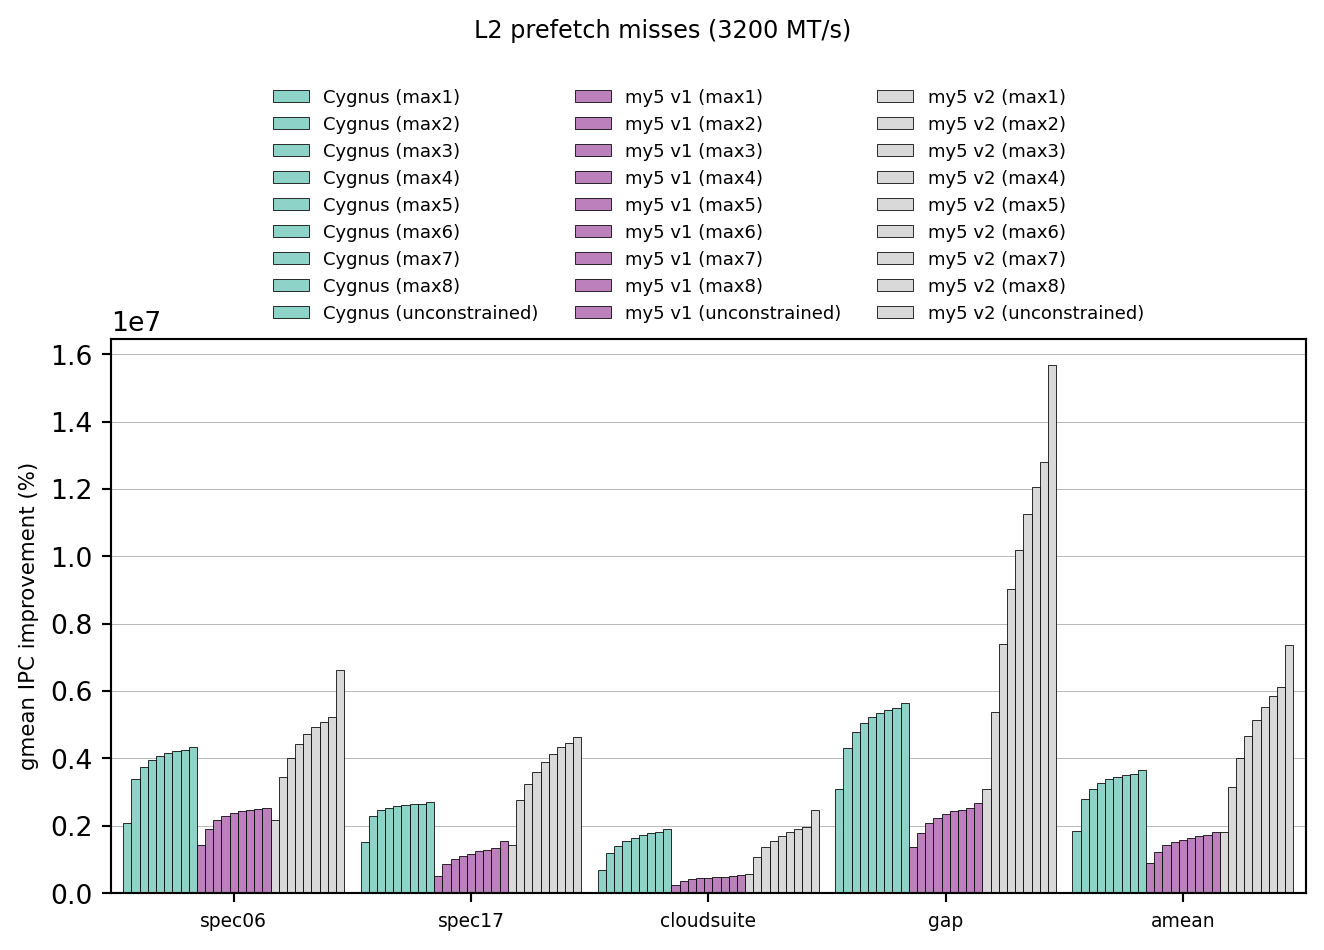

In [16]:
reload(plot)
plot.plot_suite_statistic(
    baseline_df_3200, "cache.L2C.amean.prefetch_miss",
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="L2 prefetch misses (3200 MT/s)",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    #ylim=(0, 40),
    #ytick_distance=5,
    dpi=192, figsize=(7, 5))
plt.savefig("3200_prefetch_l2_misses.png", dpi=dpi, bbox_inches="tight")
plt.savefig("3200_prefetch_l2_misses.pdf", dpi=dpi, bbox_inches="tight")

## 200 MT/s
### IPC improvement

In [12]:
reload(plot)
plot.get_suite_table(
    baseline_df_200, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gmean
Cygnus (max1),5.445932,6.804395,-1.702370,26.214231,8.722037
Cygnus (max2),4.566320,8.525364,0.004919,27.371278,9.648826
Cygnus (max3),2.872698,7.905898,-3.013110,24.224458,7.539092
Cygnus (max4),1.865966,7.358701,-5.185670,22.649590,6.194398
Cygnus (max5),1.259077,6.976242,-6.616649,21.711858,5.336992
Cygnus (max6),0.879394,6.691992,-7.651242,21.119289,4.747741
Cygnus (max7),0.631829,6.474877,-8.405943,20.734544,4.332674
Cygnus (max8),0.452233,6.388000,-8.925478,20.463872,4.058243
Cygnus (unconstrained),0.025962,6.083281,-10.298429,19.915836,3.361563
my5 v1 (max1),6.571997,8.399202,2.598355,25.221199,10.375291


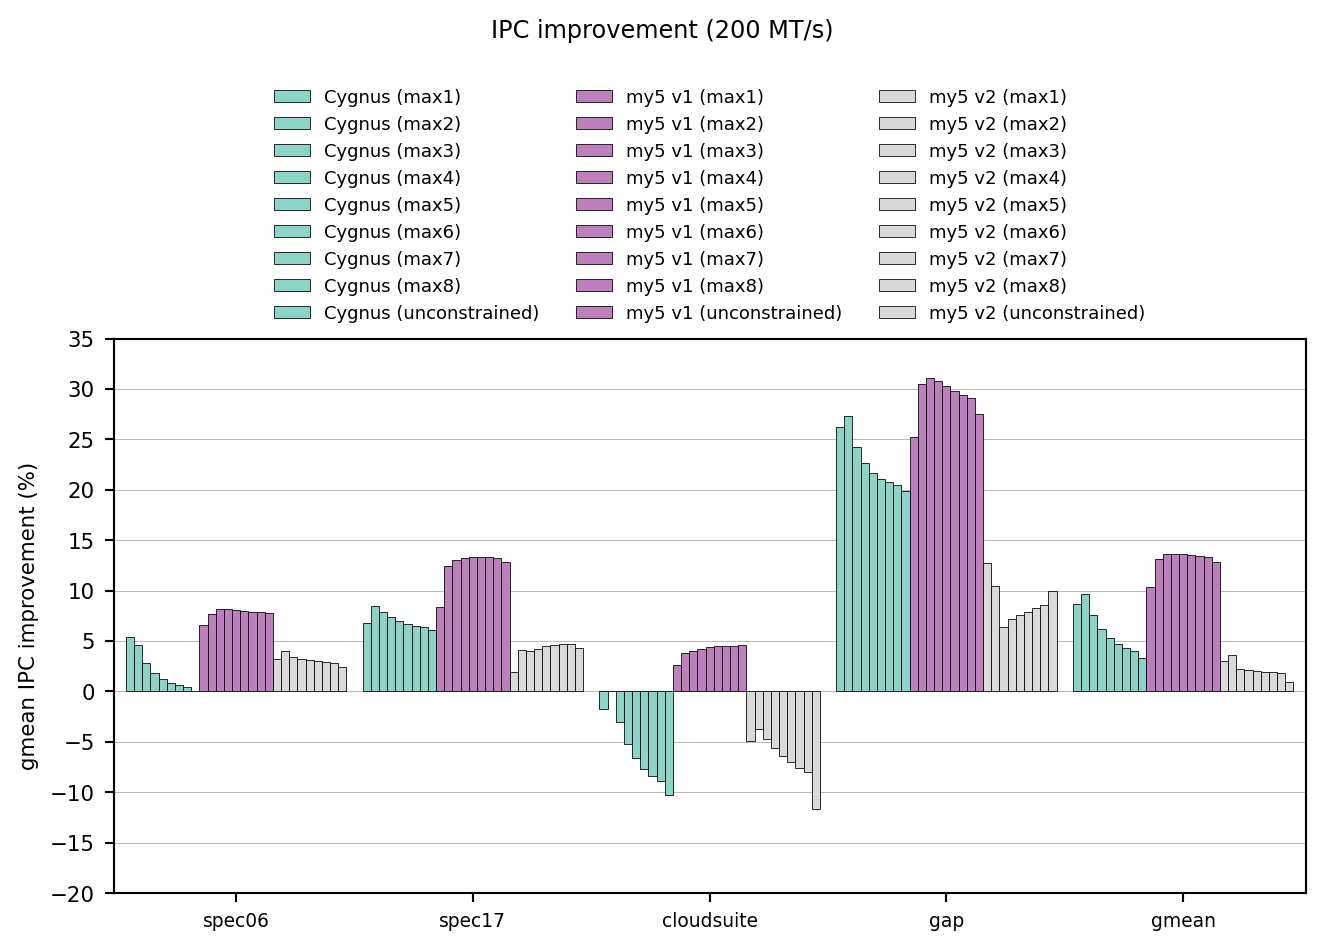

In [11]:
reload(plot)
plot.plot_suite_statistic(
    baseline_df_200, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (200 MT/s)",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(-20, 35),
    ytick_distance=5,
    dpi=192, figsize=(7, 5))
plt.savefig("200_ipc.png", dpi=dpi, bbox_inches="tight")
plt.savefig("200_ipc.pdf", dpi=dpi, bbox_inches="tight")

### Prefetches issued

In [18]:
reload(plot)
plot.get_suite_table(
    baseline_df_200, "cache.L2C.amean.prefetch_issued",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,amean
Cygnus (max1),4.176789e+06,3.624365e+06,1.627152e+06,1.123206e+07,5.165091e+06
Cygnus (max2),5.242200e+06,4.360979e+06,2.421549e+06,1.277536e+07,6.200021e+06
Cygnus (max3),5.754699e+06,4.645185e+06,2.881725e+06,1.370748e+07,6.747272e+06
Cygnus (max4),6.034657e+06,4.814524e+06,3.186171e+06,1.427759e+07,7.078236e+06
Cygnus (max5),6.219463e+06,4.941793e+06,3.404228e+06,1.473110e+07,7.324146e+06
Cygnus (max6),6.329961e+06,5.047486e+06,3.560735e+06,1.500213e+07,7.485078e+06
Cygnus (max7),6.420979e+06,5.115175e+06,3.681282e+06,1.524898e+07,7.616605e+06
Cygnus (max8),6.466169e+06,5.169385e+06,3.776197e+06,1.544466e+07,7.714102e+06
Cygnus (unconstrained),6.607819e+06,5.307199e+06,4.064778e+06,1.589809e+07,7.969471e+06
my5 v1 (max1),3.693130e+06,3.946174e+06,7.257752e+05,2.819234e+06,2.796078e+06


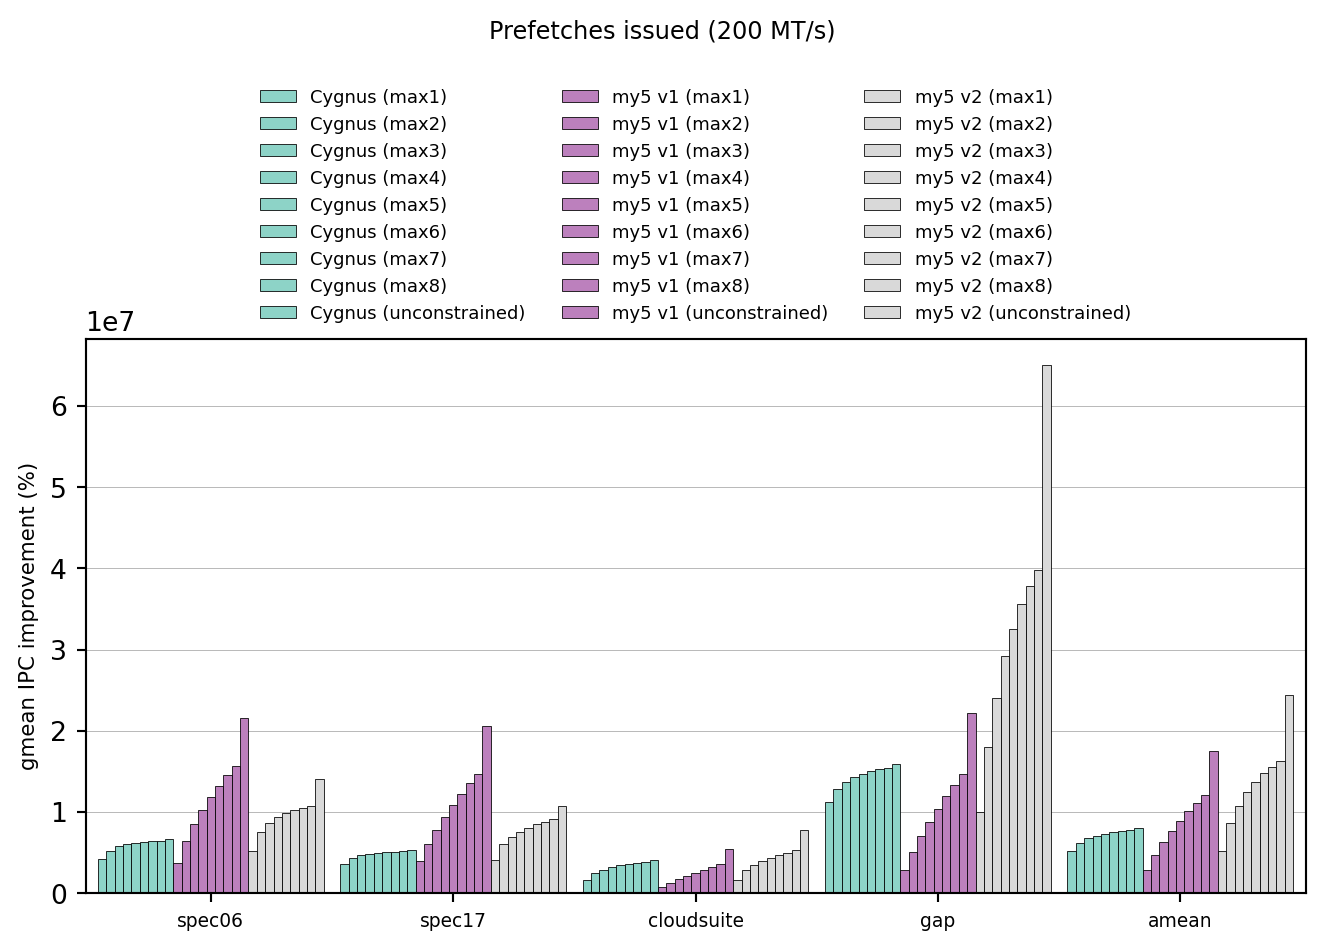

In [19]:
reload(plot)
plot.plot_suite_statistic(
    baseline_df_200, "cache.L2C.amean.prefetch_issued",
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="Prefetches issued (200 MT/s)",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    #ylim=(0, 40),
    #ytick_distance=5,
    dpi=192, figsize=(7, 5))
plt.savefig("200_prefetch_issued.png", dpi=dpi, bbox_inches="tight")
plt.savefig("200_prefetch_issued.pdf", dpi=dpi, bbox_inches="tight")

### Prefetch L2 misses

In [14]:
reload(plot)
plot.get_suite_table(
    baseline_df_200, "cache.L2C.amean.prefetch_miss",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,amean
Cygnus (max1),1.482151e+06,1.079624e+06,5.942217e+05,2.628976e+06,1.446243e+06
Cygnus (max2),2.560262e+06,1.740498e+06,1.054527e+06,3.813570e+06,2.292214e+06
Cygnus (max3),2.903377e+06,1.916106e+06,1.262388e+06,4.243676e+06,2.581387e+06
Cygnus (max4),3.065514e+06,2.002982e+06,1.392944e+06,4.476682e+06,2.734530e+06
Cygnus (max5),3.159016e+06,2.055013e+06,1.480228e+06,4.633513e+06,2.831942e+06
Cygnus (max6),3.215324e+06,2.096022e+06,1.538072e+06,4.726510e+06,2.893982e+06
Cygnus (max7),3.252745e+06,2.116266e+06,1.578313e+06,4.810972e+06,2.939574e+06
Cygnus (max8),3.275504e+06,2.133414e+06,1.607476e+06,4.854323e+06,2.967679e+06
Cygnus (unconstrained),3.354450e+06,2.177163e+06,1.682489e+06,4.974048e+06,3.047038e+06
my5 v1 (max1),1.174866e+06,3.491156e+05,1.939931e+05,1.029284e+06,6.868147e+05


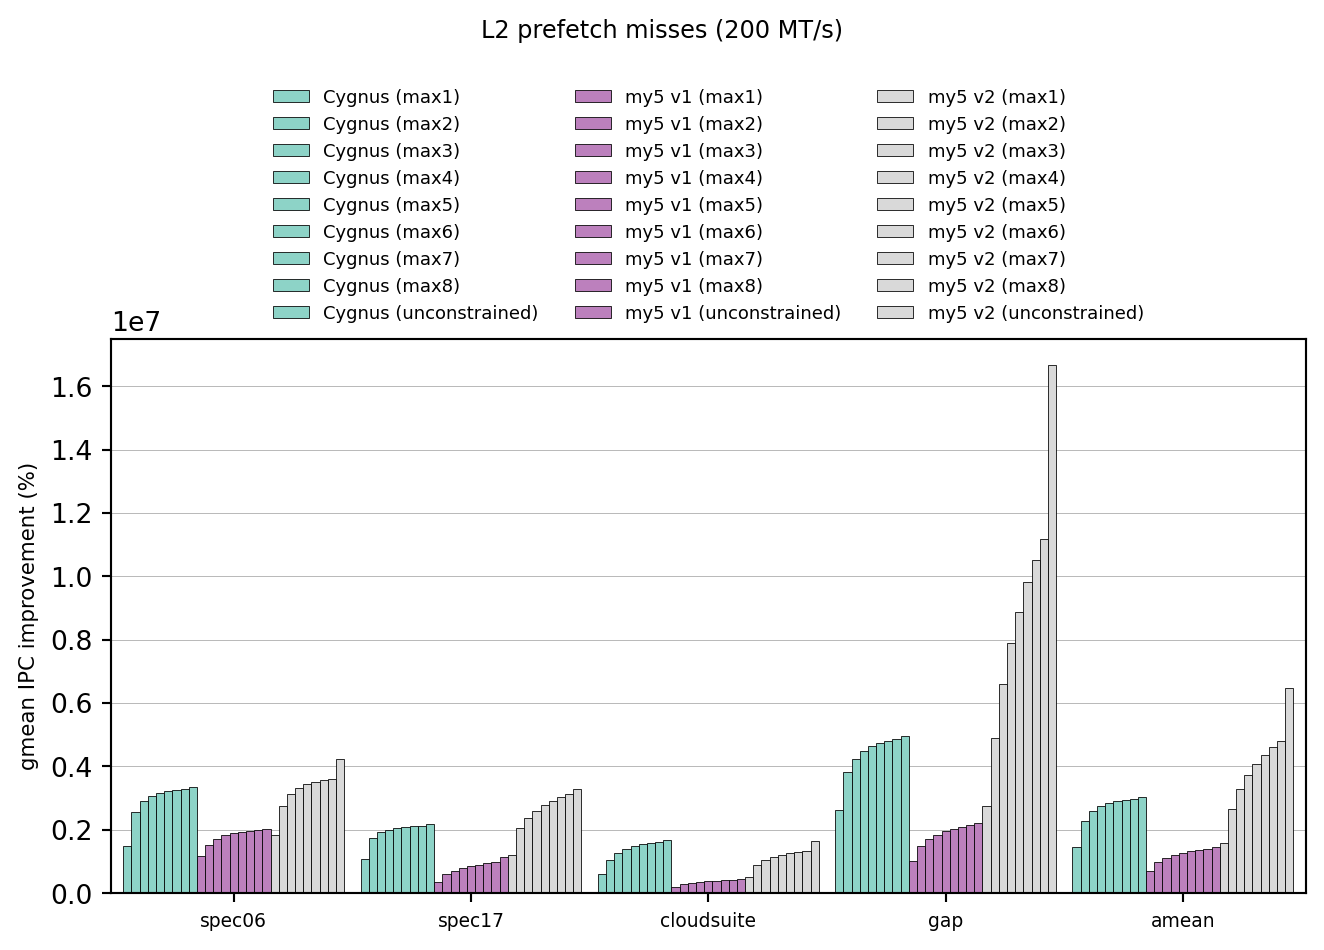

In [15]:
reload(plot)
plot.plot_suite_statistic(
    baseline_df_200, "cache.L2C.amean.prefetch_miss",
    suites=suites,
    add_mean=True,
    colors=baseline_colors,
    hatches=baseline_hatches,
    legend_kwargs=baseline_legend_kwargs,
    label_kwargs=baseline_label_kwargs,
    add_suptitle=True,
    suptitle="L2 prefetch misses (200 MT/s)",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    #ylim=(0, 40),
    #ytick_distance=5,
    dpi=192, figsize=(7, 5))
plt.savefig("200_prefetch_l2_misses.png", dpi=dpi, bbox_inches="tight")
plt.savefig("200_prefetch_l2_misses.pdf", dpi=dpi, bbox_inches="tight")